In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## data import

In [2]:
train = pd.read_csv('./train.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


## 결측치 시각화

seaborn과 missingno를 이용해서 결측치 정보를 시각화해보자.

In [3]:
import seaborn as sns
import missingno as msno

In [4]:
train_processed = train.drop('id', axis=1)

train_processed.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


                              id      hour  hour_bef_temperature  \
id                      1.000000 -0.010901             -0.000029   
hour                   -0.010901  1.000000              0.407306   
hour_bef_temperature   -0.000029  0.407306              1.000000   
hour_bef_precipitation -0.056267  0.021646             -0.097056   
hour_bef_windspeed     -0.003353  0.462797              0.375618   
hour_bef_humidity      -0.017948 -0.329612             -0.496088   
hour_bef_visibility     0.008950  0.176491              0.197417   
hour_bef_ozone          0.055234  0.390188              0.541228   
hour_bef_pm10          -0.025510 -0.035907             -0.003830   
hour_bef_pm2.5          0.003545 -0.061229             -0.078665   
count                  -0.002131  0.626047              0.619404   

                        hour_bef_precipitation  hour_bef_windspeed  \
id                                   -0.056267           -0.003353   
hour                                  0.021

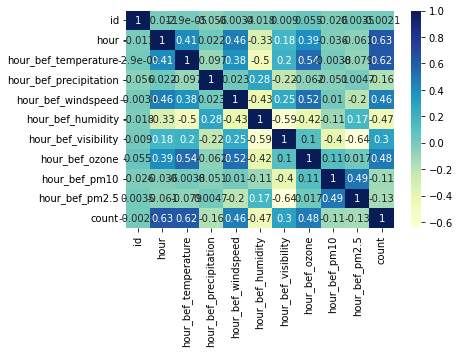

In [5]:
print(train.corr())

dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

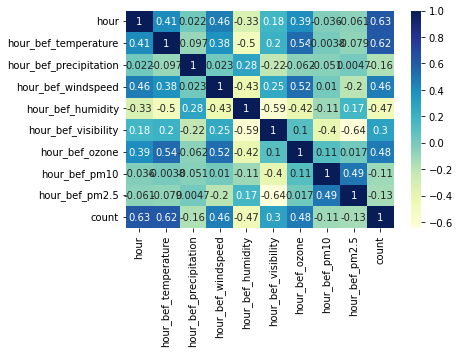

In [6]:
dataplot2 = sns.heatmap(train_processed.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

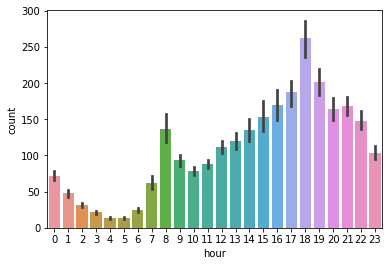

In [7]:
sns.barplot(train,x='hour',y='count')
plt.show()

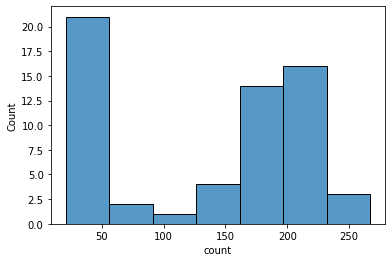

In [8]:
train_8h = train.loc[train['hour'] ==8]

sns.histplot(data = train_8h['count'])
plt.show()

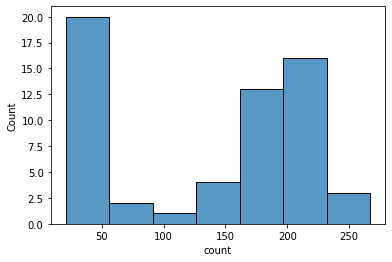

In [16]:
train_rain_check = train_8h.loc[train_8h['hour_bef_precipitation'] == 0]

sns.histplot(data = train_rain_check['count'])
plt.show()

      id  hour  hour_bef_temperature  hour_bef_precipitation  \
309  480     8                  14.5                     1.0   
539  831     8                  10.0                     1.0   

     hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
309                 1.9               94.0                128.0   
539                 3.5               99.0                106.0   

     hour_bef_ozone  hour_bef_pm10  hour_bef_pm2.5  count  
309           0.013           60.0            34.0  165.0  
539           0.029           26.0            24.0   41.0  


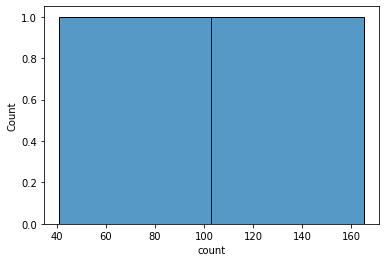

In [19]:
train_rain_check = train_8h.loc[train_8h['hour_bef_precipitation'] == 1.0]

print(train_rain_check)

sns.histplot(data = train_rain_check['count'])
plt.show()

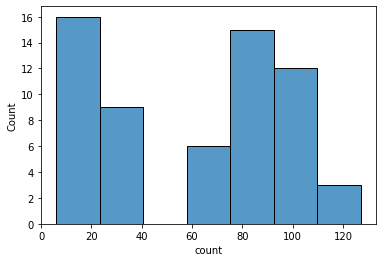

In [10]:
train_7h = train.loc[train['hour'] ==7]

sns.histplot(data = train_7h['count'])
plt.show()

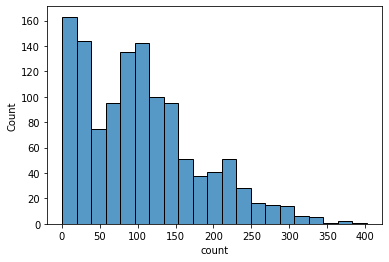

In [11]:
train_highT = train.loc[(train['hour_bef_temperature'] >=10) & (train['hour_bef_temperature'] <=25)]

sns.histplot(data = train_highT['count'])
plt.show()

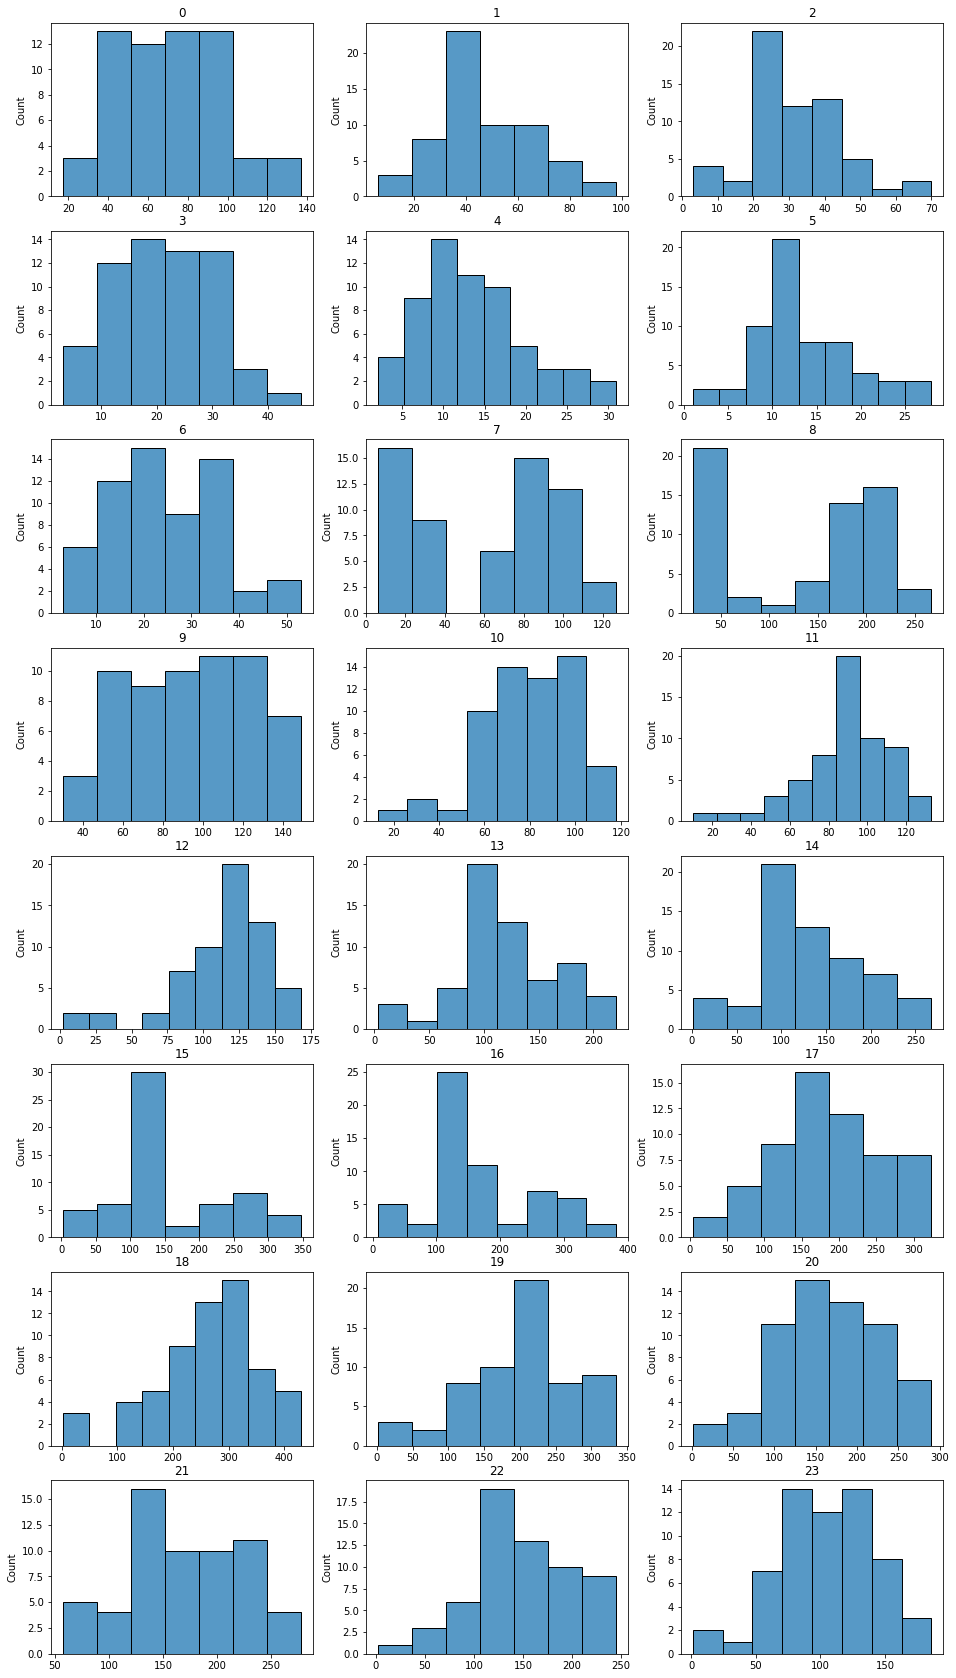

In [12]:
hour_values = train['hour'].unique()

plt.figure(figsize=(16, 30))

for hour in hour_values:
    plt.subplot(8, 3, hour+1)
    sns.histplot(data=train['count'].loc[train['hour']==hour])
    plt.title(f'{hour}')
    plt.xlabel('\n')

plt.show()

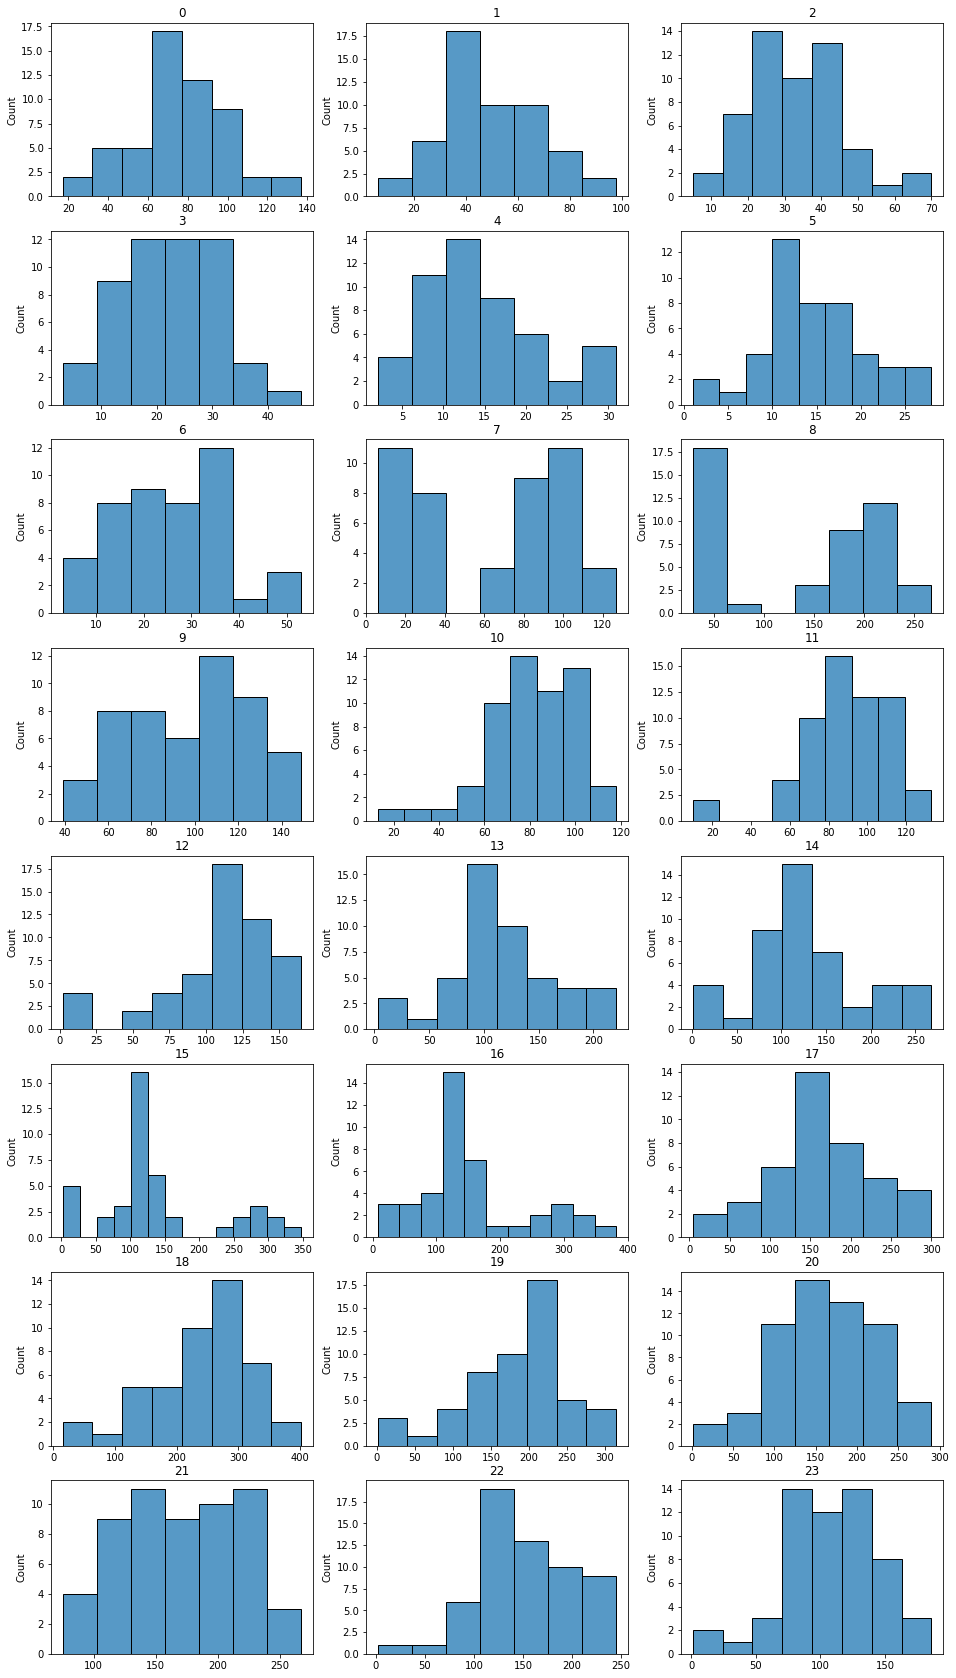

In [29]:
plt.figure(figsize=(16, 30))

for hour in hour_values:
    plt.subplot(8, 3, hour+1)
    sns.histplot(data=train['count'].loc[train['hour']==hour].loc[(train['hour_bef_temperature'] >=10) & (train['hour_bef_temperature'] <=25)])
    plt.title(f'{hour}')
    plt.xlabel('\n')

plt.show()

<AxesSubplot:>

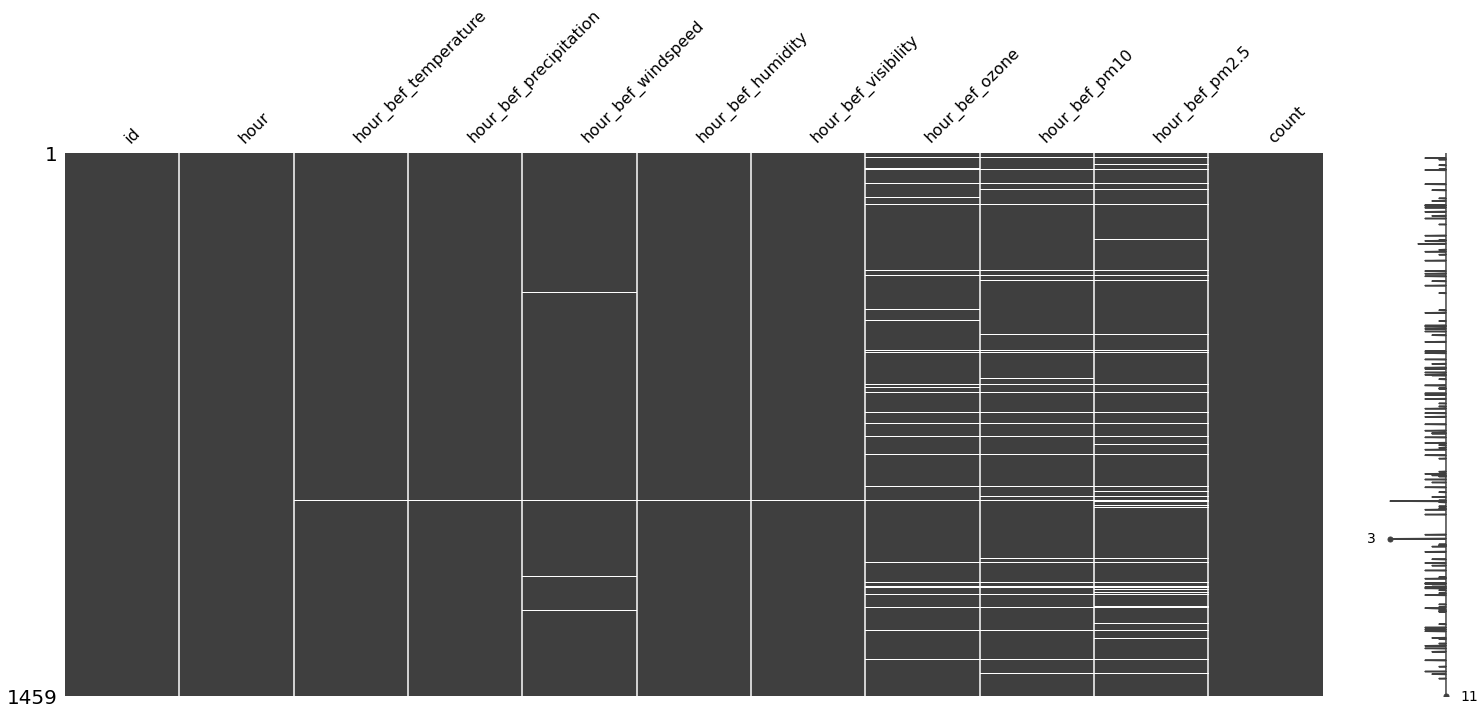

In [13]:
msno.matrix(train)

<AxesSubplot:>

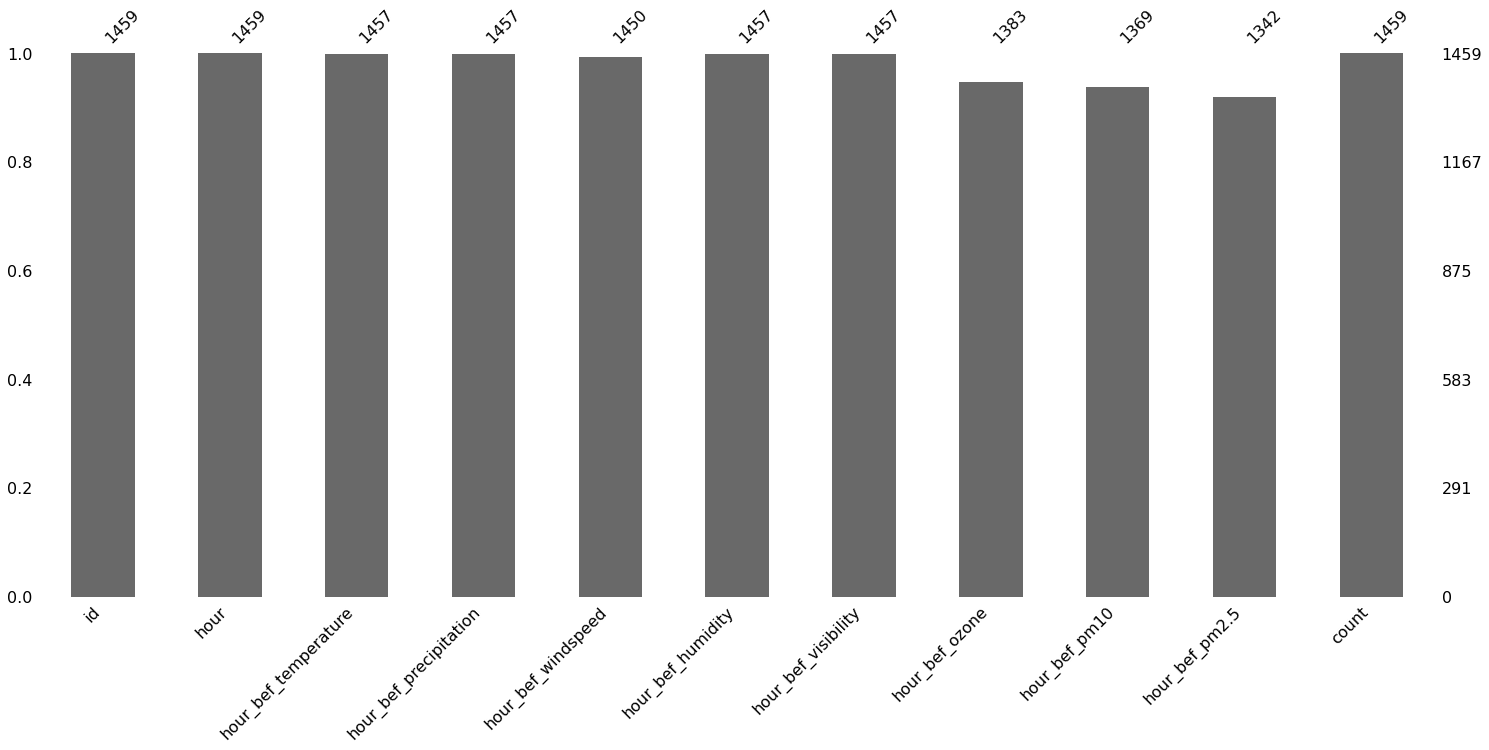

In [14]:
msno.bar(train)

<AxesSubplot:>

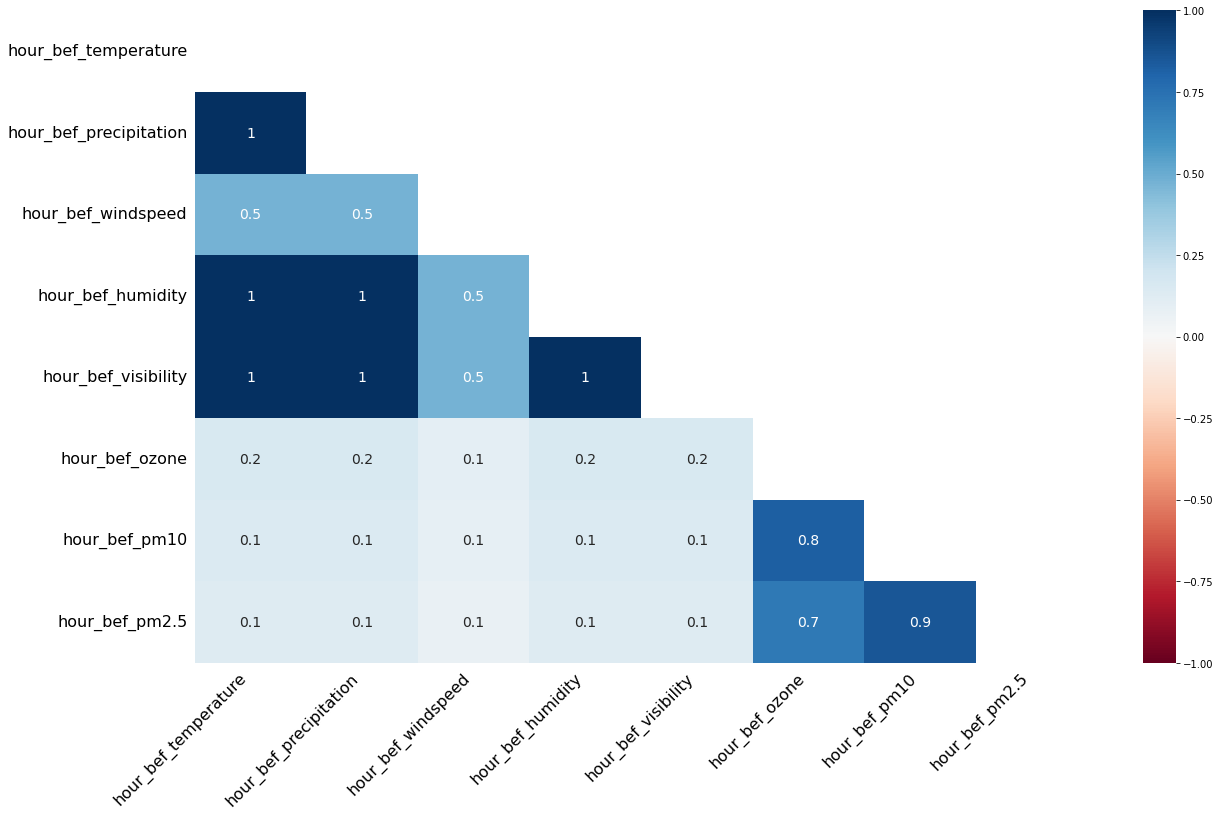

In [15]:
msno.heatmap(train)